**Milestone 3: Exploratory Data Analysis (EDA)**

**Objective**: Identify demand elasticity and customer segmentation.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("dynamic_pricing.csv")
#checking for number of numerical and categorical columns
num_features = df.select_dtypes(include='number').shape[1]
cat_features = df.select_dtypes(include=['object', 'category']).shape[1]
print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: 6
Categorical features: 4


In [18]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [19]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [20]:
for col in df.select_dtypes(include=['object', 'category']):
    print(col, ":", df[col].unique())

Location_Category : ['Urban' 'Suburban' 'Rural']
Customer_Loyalty_Status : ['Silver' 'Regular' 'Gold']
Time_of_Booking : ['Night' 'Evening' 'Afternoon' 'Morning']
Vehicle_Type : ['Premium' 'Economy']


Data Visualization and Handling Outliers

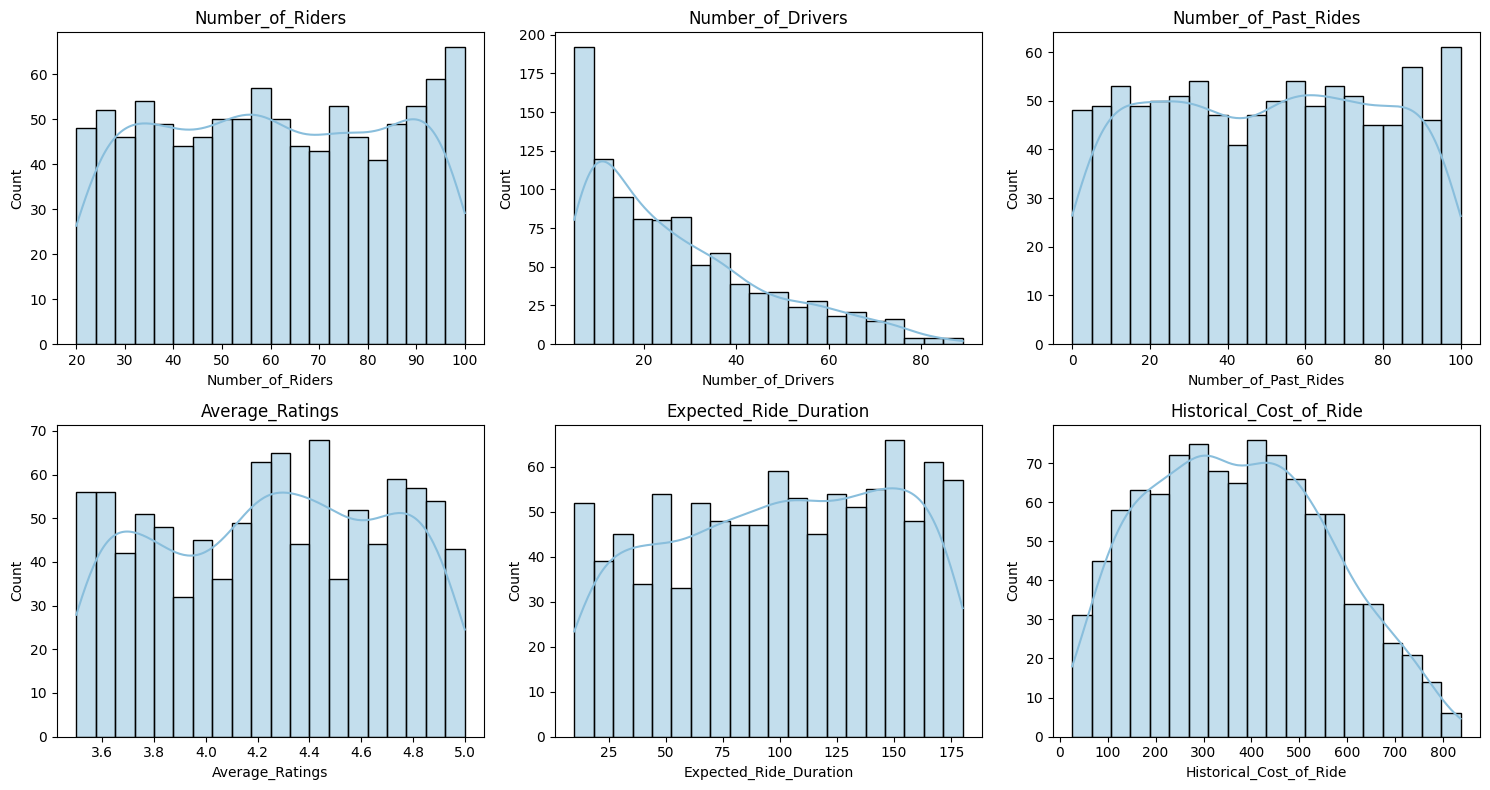

C:\Users\sabar\AppData\Local\Temp\ipykernel_17632\1060985463.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\sabar\AppData\Local\Temp\ipykernel_17632\1060985463.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\sabar\AppData\Local\Temp\ipykernel_17632\1060985463.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
C:\Users\sabar\AppData\Local\Temp\ipykernel_17632\1060985463.py:21:

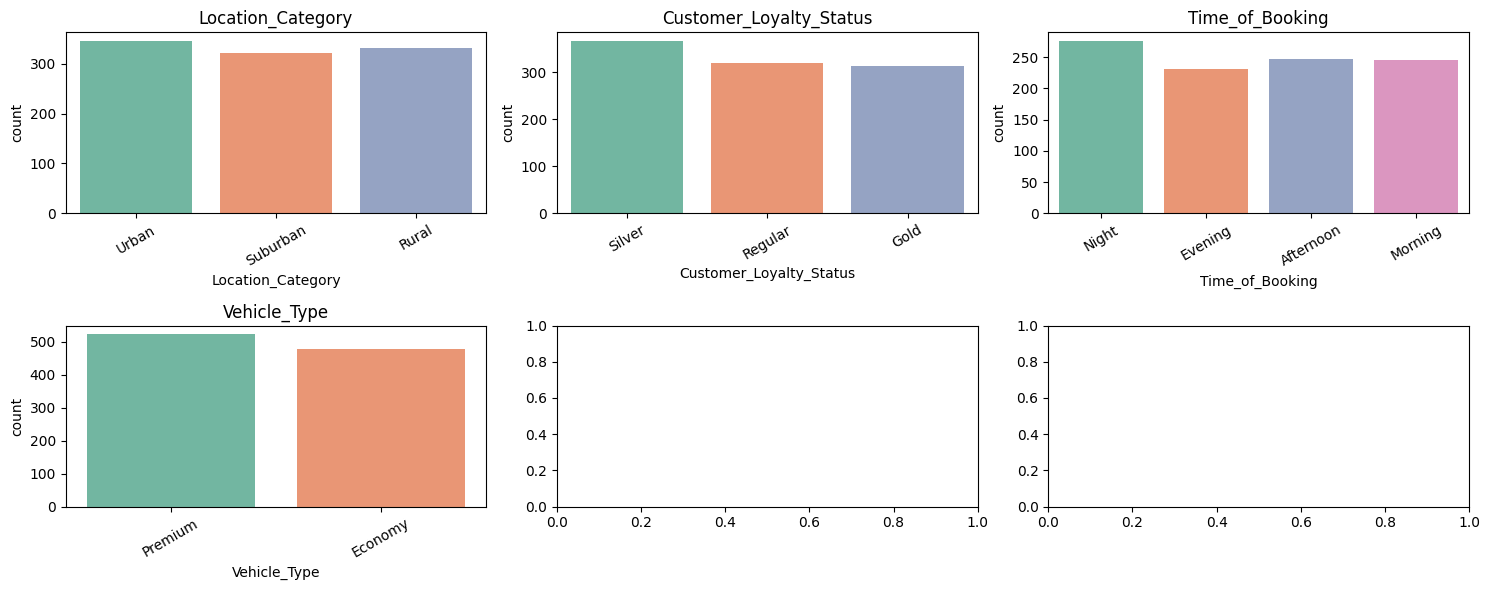

In [21]:
num_palette="Blues"
cat_palette="Set2"

numeric_cols = [
    'Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides',
    'Average_Ratings','Expected_Ride_Duration','Historical_Cost_of_Ride'
]
categorical_cols = [
    'Location_Category','Customer_Loyalty_Status',
    'Time_of_Booking','Vehicle_Type'
]

fig, axes = plt.subplots((len(numeric_cols)+2)//3, 3, figsize=(15,8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, color=sns.color_palette(num_palette)[2], ax=ax)
    ax.set_title(col)
plt.tight_layout(); plt.show()

fig, axes = plt.subplots((len(categorical_cols)+2)//3, 3, figsize=(15,6))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=col, data=df, palette=cat_palette, ax=ax)
    ax.set_title(col); ax.tick_params(axis="x", rotation=30)
plt.tight_layout(); plt.show()

Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


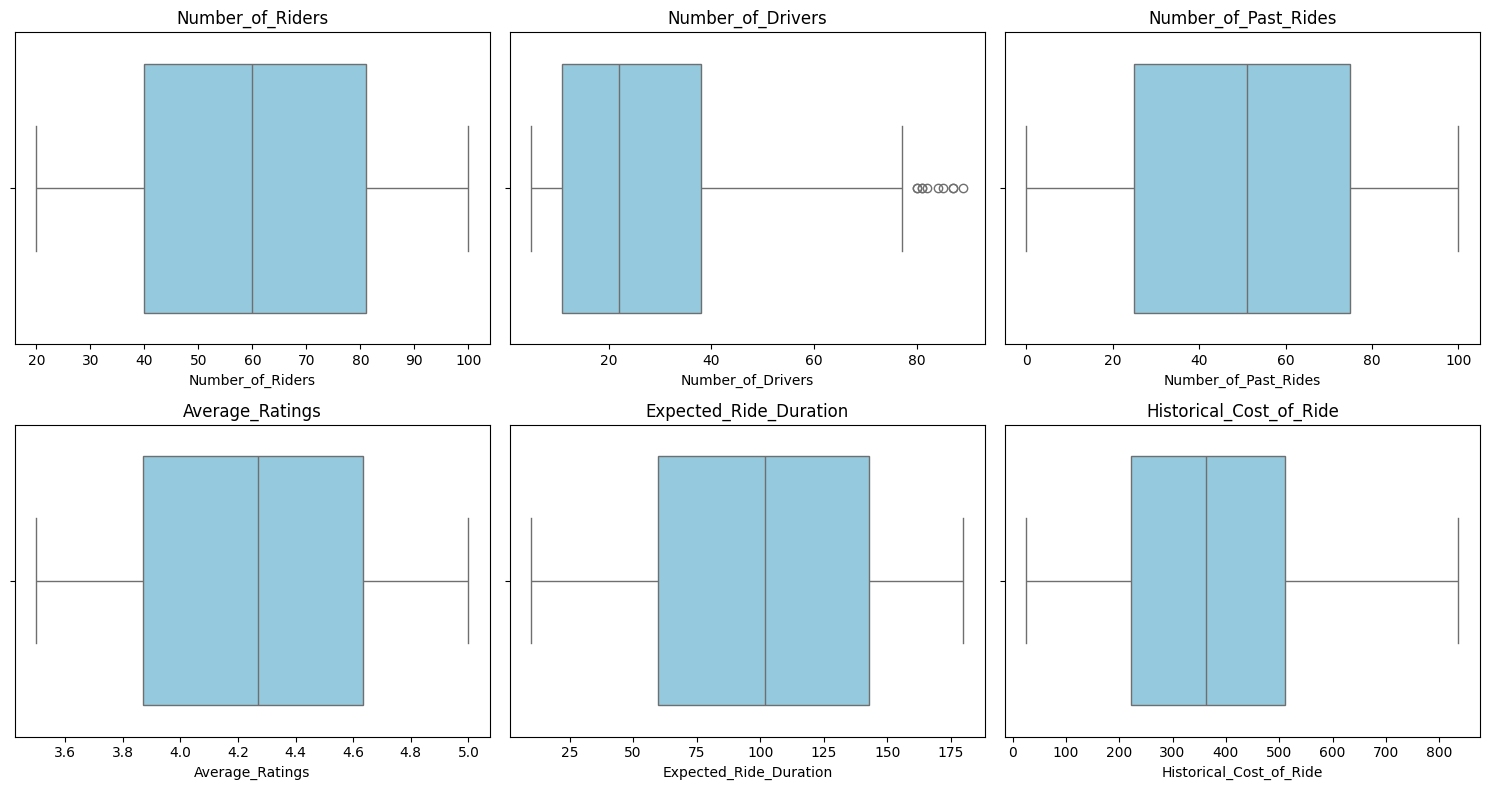

In [22]:
for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

#visualizing for outliers
fig, axes = plt.subplots((len(numeric_cols)+2)//3, 3, figsize=(15,8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(x=df[col], ax=ax, color="skyblue")
    ax.set_title(col)
plt.tight_layout(); plt.show()

Lower bound: -29.5, Upper bound: 78.5


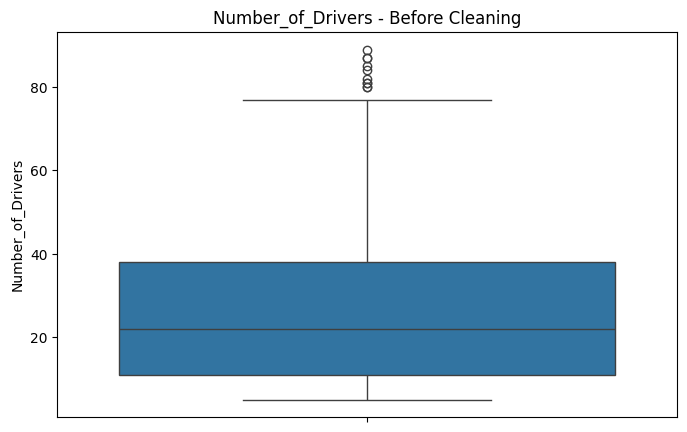

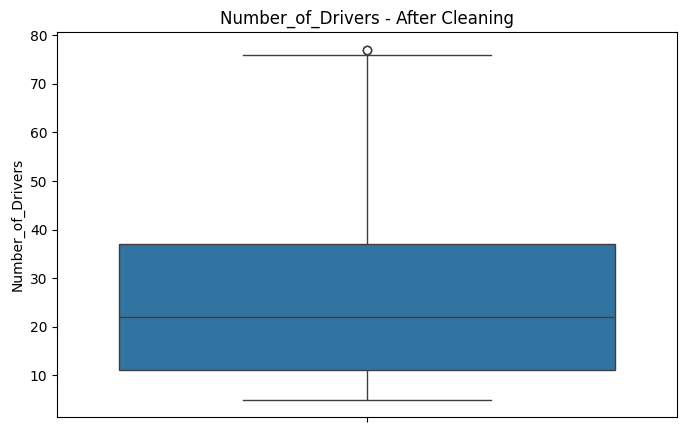

Rows before cleaning: 1000, Rows after cleaning: 990


In [23]:
Q1 = df['Number_of_Drivers'].quantile(0.25)
Q3 = df['Number_of_Drivers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

plt.figure(figsize=(8,5))
sns.boxplot(y=df['Number_of_Drivers'])
plt.title('Number_of_Drivers - Before Cleaning')
plt.show()

df_cleaned = df[(df['Number_of_Drivers'] >= lower_bound) & (df['Number_of_Drivers'] <= upper_bound)]

plt.figure(figsize=(8,5))
sns.boxplot(y=df_cleaned['Number_of_Drivers'])
plt.title('Number_of_Drivers - After Cleaning')
plt.show()

print(f"Rows before cleaning: {len(df)}, Rows after cleaning: {len(df_cleaned)}")

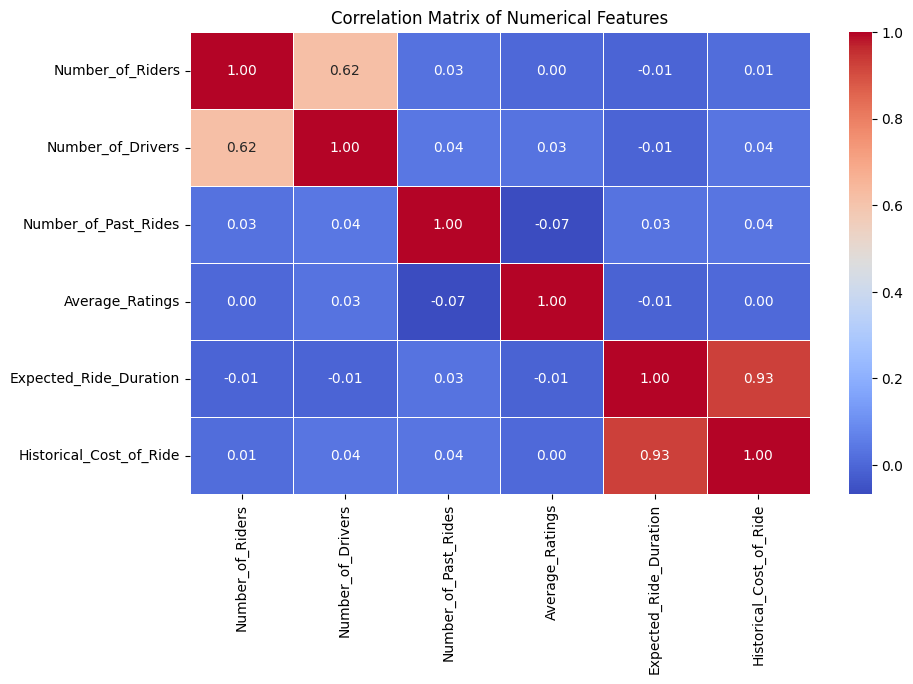

In [24]:
corr_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

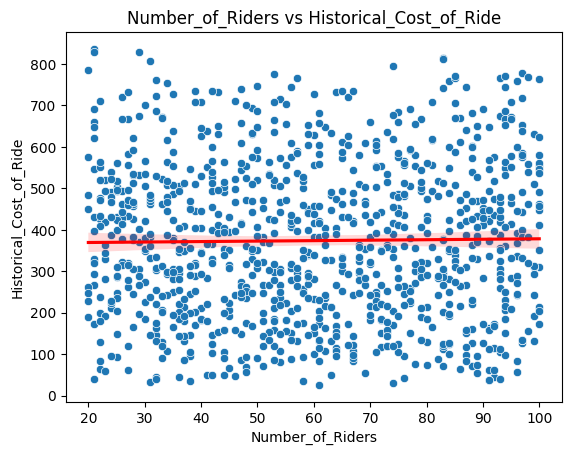

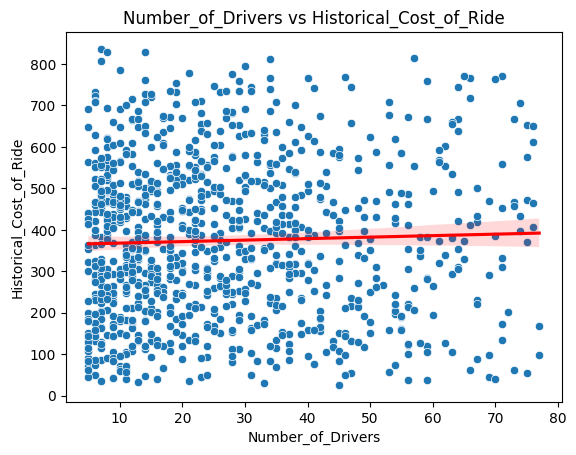

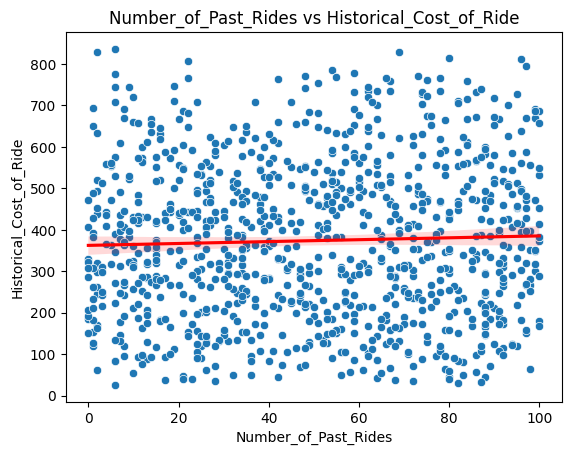

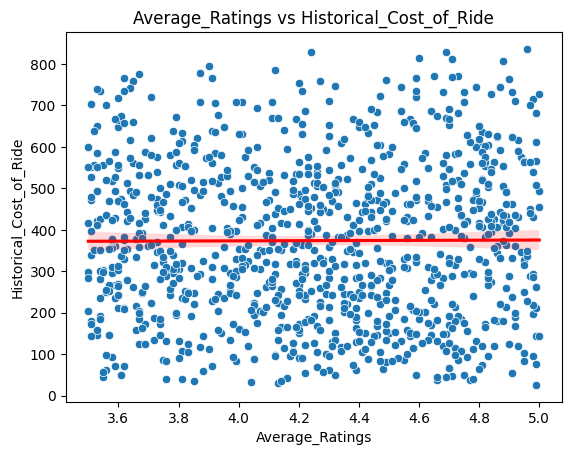

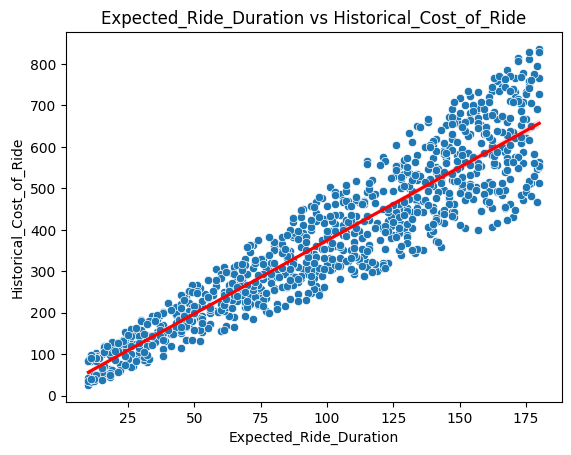

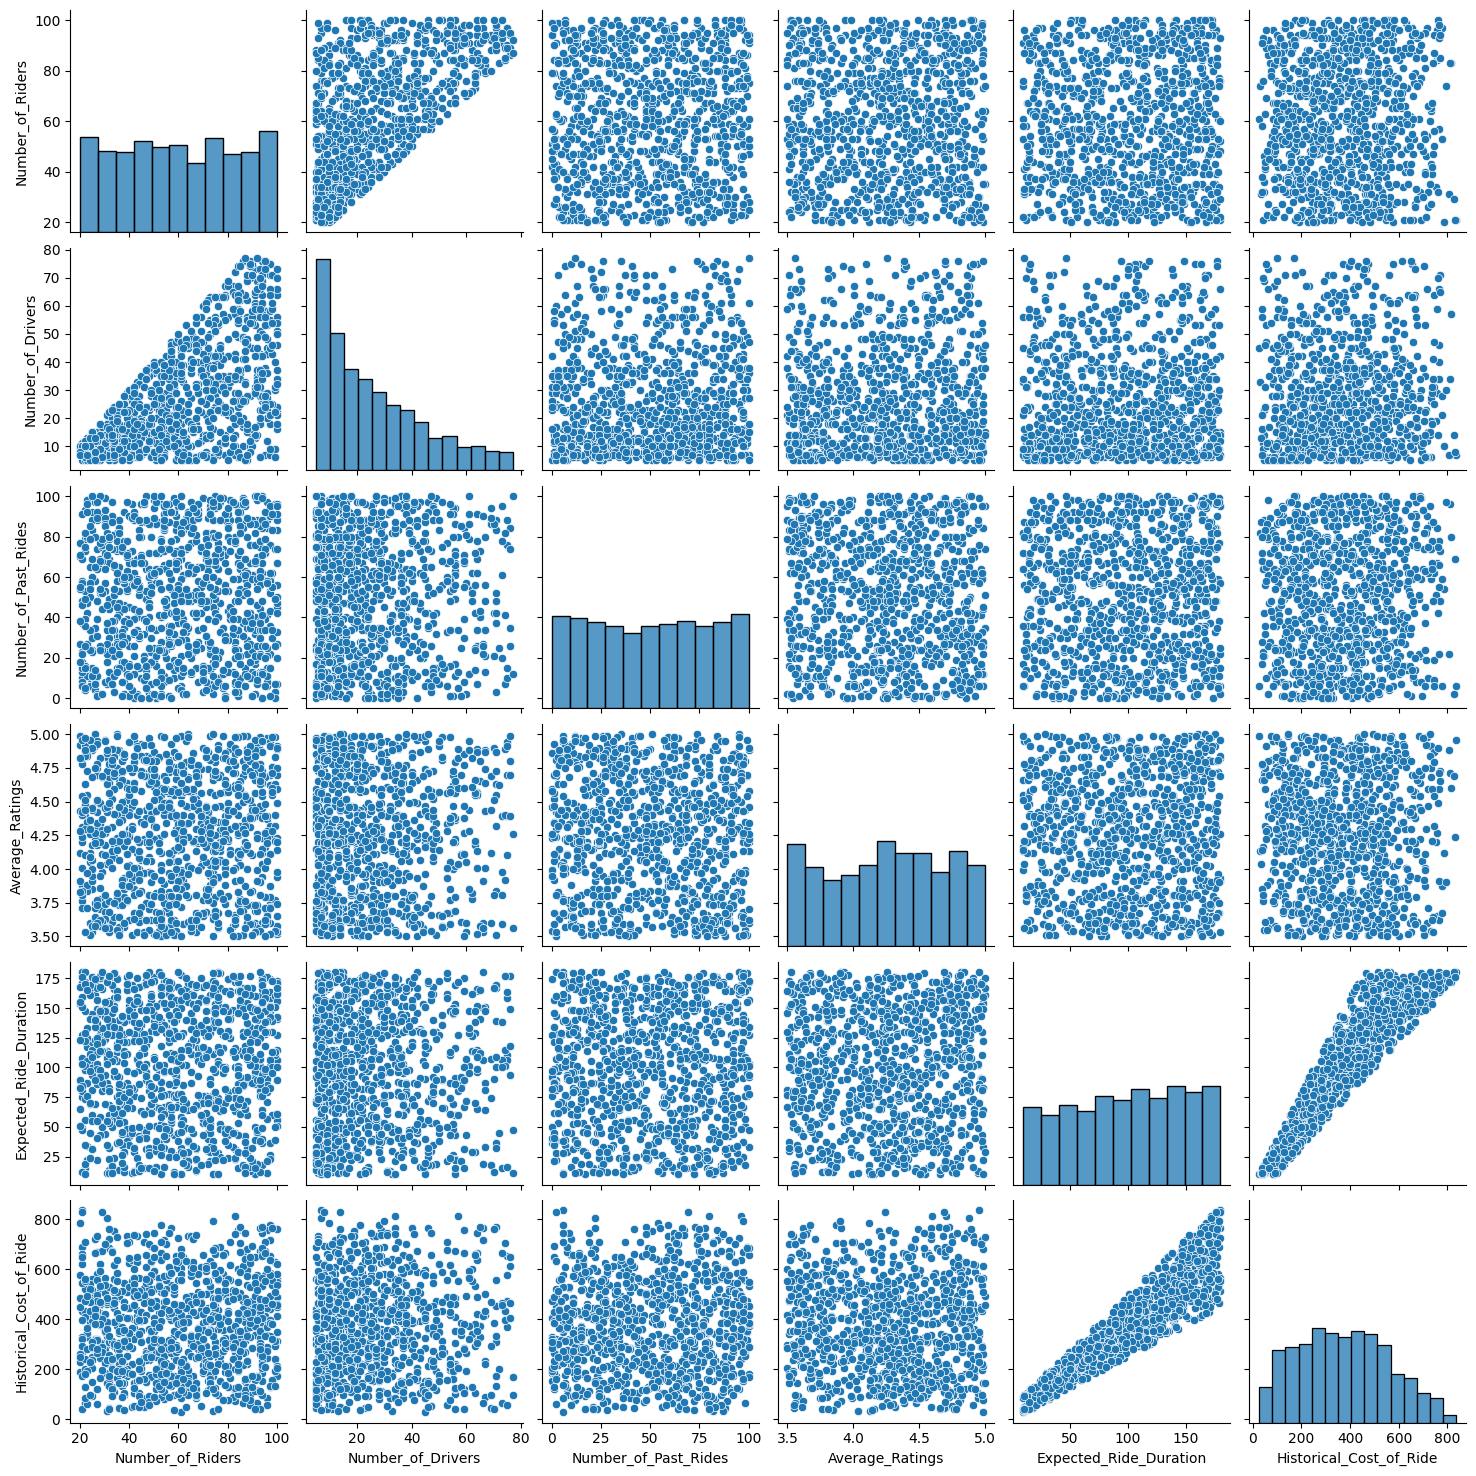

In [25]:
numerical_features = [
    'Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
    'Average_Ratings', 'Expected_Ride_Duration'
]

target = 'Historical_Cost_of_Ride'

for feature in numerical_features:
    sns.scatterplot(x=feature, y=target, data=df_cleaned)
    sns.regplot(x=feature, y=target, data=df_cleaned, scatter=False, color='red')
    plt.title(f'{feature} vs {target}')
    plt.show()

sns.pairplot(df_cleaned[numerical_features + [target]])
plt.show()

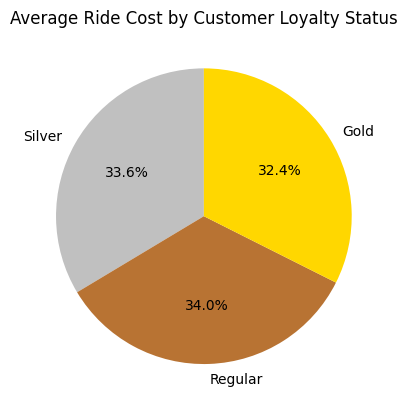

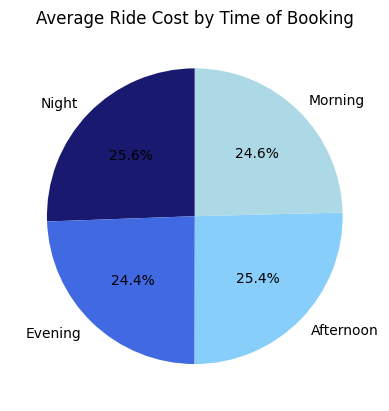

In [26]:
#visualization based on avg price with reference to customer loyal status and time of booking
loyalty_avg = df_cleaned.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean()

colors_loyalty = ["#C0C0C0", "#B87333", "#FFD700"]  

plt.pie(
    loyalty_avg,
    labels=["Silver", "Regular", "Gold"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors_loyalty
)
plt.title("Average Ride Cost by Customer Loyalty Status")
plt.show()

time_avg = df_cleaned.groupby("Time_of_Booking")["Historical_Cost_of_Ride"].mean()

colors_time = ["#191970", "#4169E1", "#87CEFA", "#ADD8E6"]  

plt.pie(
    time_avg,
    labels=["Night", "Evening", "Afternoon", "Morning"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors_time
)
plt.title("Average Ride Cost by Time of Booking")
plt.show()

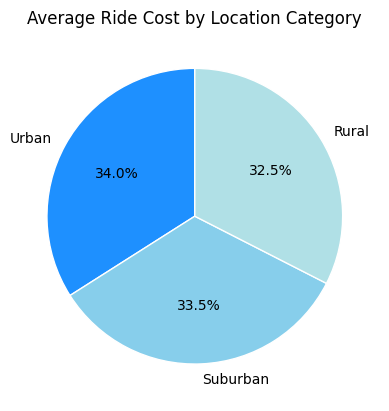

In [27]:
#visualization based on avg price with reference to location
location_avg = df_cleaned.groupby("Location_Category")["Historical_Cost_of_Ride"].mean()

colors = ["#1E90FF", "#87CEEB", "#B0E0E6"] 

plt.pie(
    location_avg,
    labels=["Urban", "Suburban", "Rural"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Average Ride Cost by Location Category")
plt.show()

In [28]:
df_cleaned.to_csv("cleaned_csv_data.csv", index=False)

print("Cleaned data saved as 'cleaned_csv_data.csv'")

Cleaned data saved as 'cleaned_csv_data.csv'
